In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

# Data loading

In [2]:
# loading of all the features
chunk_data = np.load('../processed_ntuples/chunking/chunk_wnu_source_data.npy')

# feats labels, including nu data and the new variables: Pelliccioli (cos\theta* in 1710.09339), Collins-Soper (cos\theta in 1605.05450), Atlas (cos\theta_2D in 1203.2165), Polish (R_pT in 1201.2768)
features = ['lepPt1', 'lepPt2', 'lepEta1', 'lepEta2', 'lepPhi1', 'lepPhi2', 'vbsjetPt1', 'vbsjetPt2',
            'vbsjetEta1', 'vbsjetEta2', 'vbsjetPhi1', 'vbsjetPhi2', 'vbsjetM1', 'vbsjetM2', 'nvbsjetPt1',
            'nvbsjetPt2', 'nvbsjetEta1', 'nvbsjetEta2', 'nvbsjetPhi1', 'nvbsjetPhi2', 'nvbsjetM1', 'nvbsjetM2',
            'mjj', 'detajj', 'ptMET', 'phiMET', 'ptv1', 'ptv2', 'etav1', 'etav2', 'phiv1', 'phiv2',
            'costheta_1', 'costheta_2', 'cos_cs', 'cos_th_1', 'cos_th_2', 'r_pt']

# df
data_df = pd.DataFrame(dict(zip(features, chunk_data.T[:-1])))
data_df

,lepPt1,lepPt2,lepEta1,lepEta2,lepPhi1,lepPhi2,vbsjetPt1,vbsjetPt2,vbsjetEta1,vbsjetEta2,...,etav1,etav2,phiv1,phiv2,costheta_1,costheta_2,cos_cs,cos_th_1,cos_th_2,r_pt
0,38.151119,30.614485,-1.785400,0.469055,-1.918213,-1.228027,93.035866,92.568840,-2.399902,2.033691,...,-0.379883,-0.876953,1.789062,1.039062,-0.865999,0.036969,0.969282,0.996821,-0.893953,0.135619
1,105.686493,37.537052,-2.027832,-0.713379,2.560547,-1.726074,131.850616,63.007259,-2.770508,3.125977,...,0.837891,-3.789062,0.433594,-2.773438,-0.972568,-0.175113,0.588047,0.999960,0.934432,0.477537
2,126.242592,65.709923,1.002197,0.058304,-0.801025,2.343262,173.154785,61.253094,1.701172,-3.809570,...,-0.017822,1.070312,-3.125000,2.187500,0.939402,0.768561,0.421404,0.952803,0.993746,0.782122
3,97.932159,55.488510,1.444336,-1.477783,-2.244629,1.941650,140.346786,135.559814,3.371094,-1.844971,...,-0.900391,0.904297,0.785156,-0.679688,0.810599,-0.822505,0.913032,0.986218,0.994586,0.285624
4,39.560265,37.509918,0.323120,-0.412415,-1.926758,2.219727,117.264397,77.769096,-2.772461,1.155518,...,0.587891,-1.453125,-0.718750,2.671875,0.798592,-0.682566,-0.394249,0.998352,0.995729,0.162717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527370,86.975769,73.176216,0.408142,-0.990479,-3.001465,-1.989990,366.362610,157.809418,-1.580566,1.763428,...,-0.931641,-0.454102,-0.925781,2.406250,-0.530658,-0.875718,-0.840522,0.996237,0.998730,0.110084
527371,203.412247,79.566971,0.428589,-2.119141,2.568359,-1.905518,159.916245,118.268333,-3.284668,2.085938,...,-1.167969,-0.079102,-0.843750,-0.353516,-0.117649,-0.974972,-0.875020,0.999998,0.999595,0.855754
527372,66.568047,31.840185,-0.382690,1.130127,-0.028881,-0.155640,290.429535,132.952209,3.160156,-2.029785,...,-0.955078,0.003616,-0.603516,-0.904297,-0.435774,0.590562,-0.957613,0.926681,0.930501,0.054891
527373,145.252548,87.633507,-0.253662,0.770142,0.478394,-2.872559,200.250595,62.001541,-1.179443,2.180176,...,0.740234,-0.354492,-2.320312,1.210938,0.050256,0.653116,-0.461873,0.998884,0.987560,1.025221


In [3]:
# ll: 153288, tl: 173972, tt: 200115
ll_df = data_df.iloc[:153288]
tl_df = data_df.iloc[153288:153288+173972]
tt_df = data_df.iloc[153288+173972:]
tx_df = data_df.iloc[153288:]

# Correlation matrices

LL data

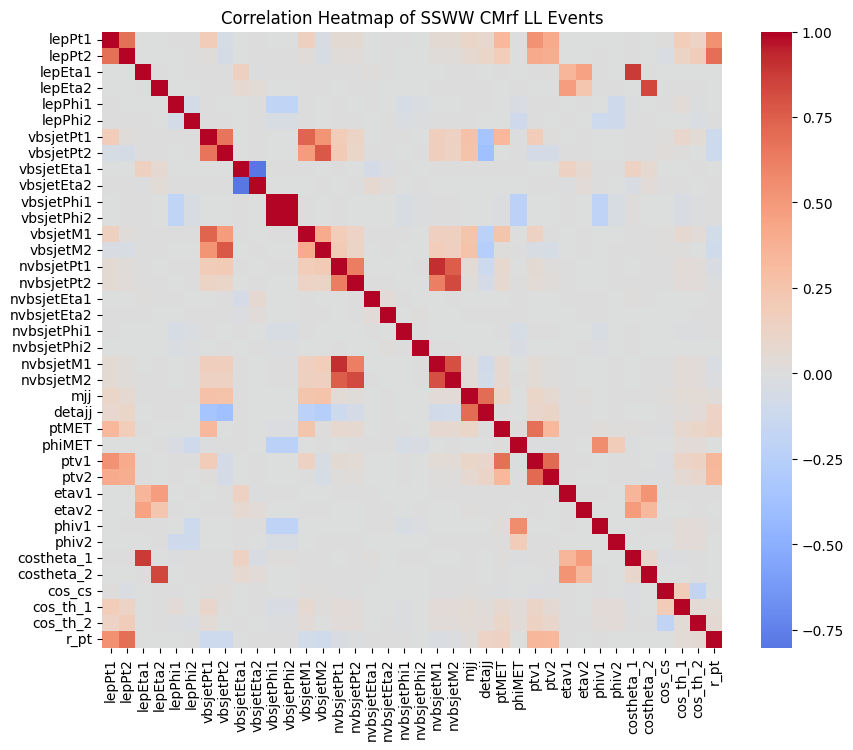

In [4]:
ll_corr_matrix = ll_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(ll_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf LL Events')
plt.savefig('corr_source/ll_corr_source.png', dpi=500, bbox_inches='tight')

TL data

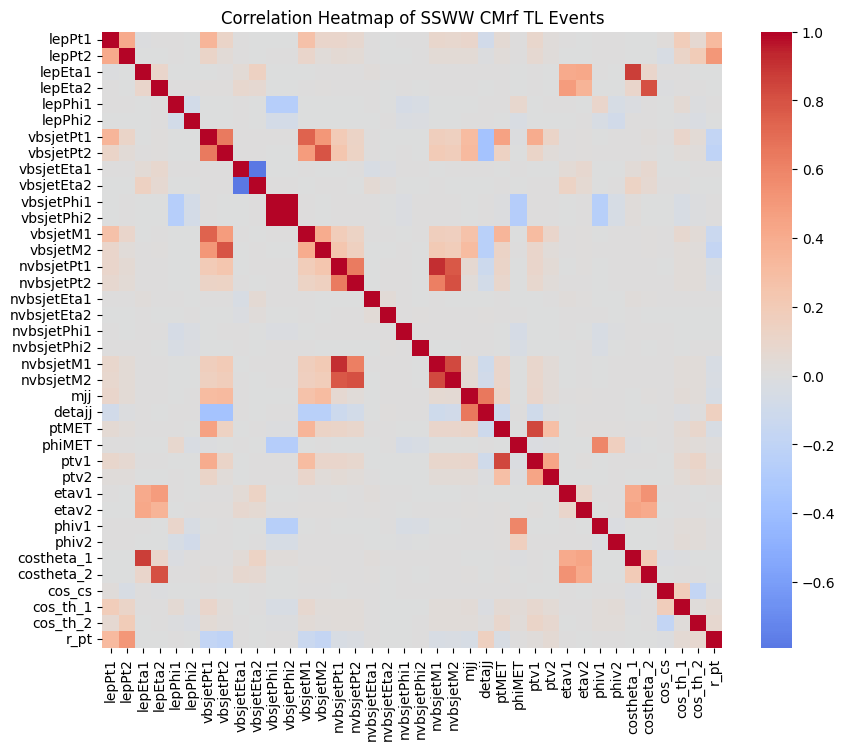

In [5]:
tl_corr_matrix = tl_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tl_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf TL Events')
plt.savefig('corr_source/tl_corr_source.png', dpi=500, bbox_inches='tight')

TT data

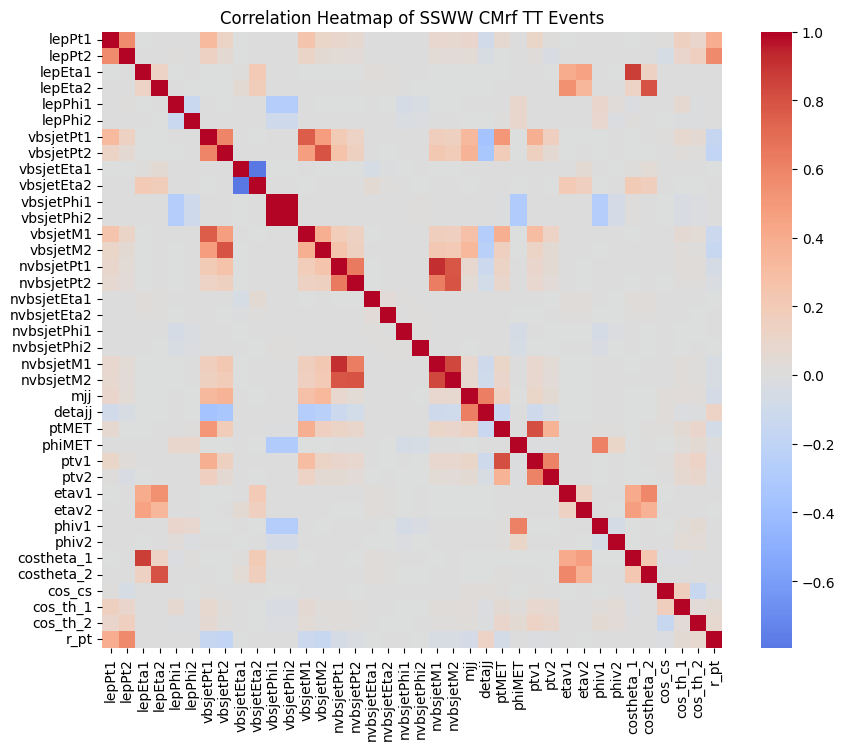

In [6]:
tt_corr_matrix = tt_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tt_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf TT Events')
plt.savefig('corr_source/tt_corr_source.png', dpi=500, bbox_inches='tight')

TX data (i.e. TL and TT)

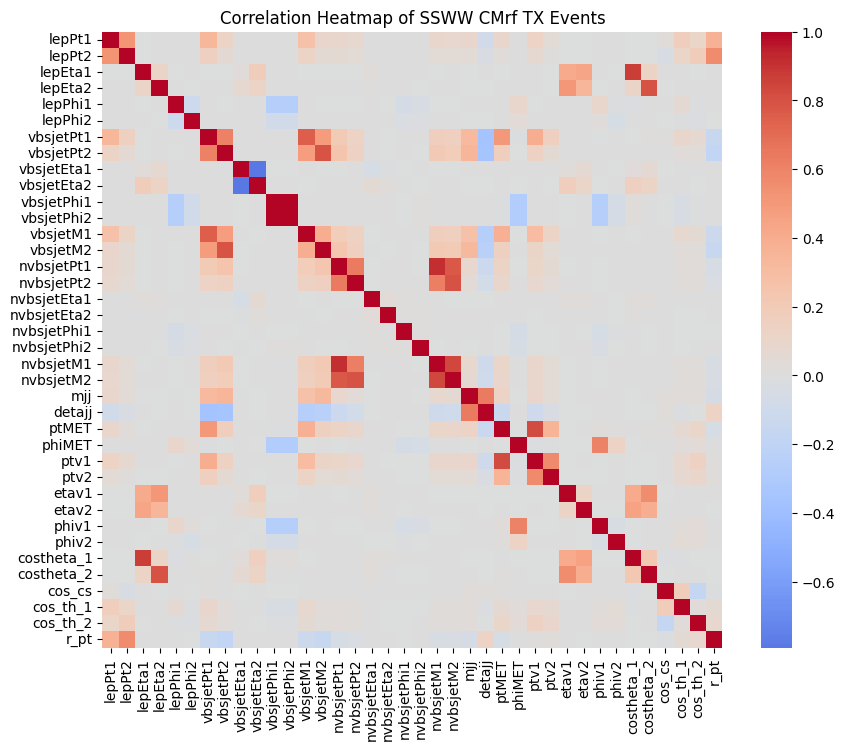

In [7]:
tx_corr_matrix = tx_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tx_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf TX Events')
plt.savefig('corr_source/tx_corr_source.png', dpi=500, bbox_inches='tight')

Full data

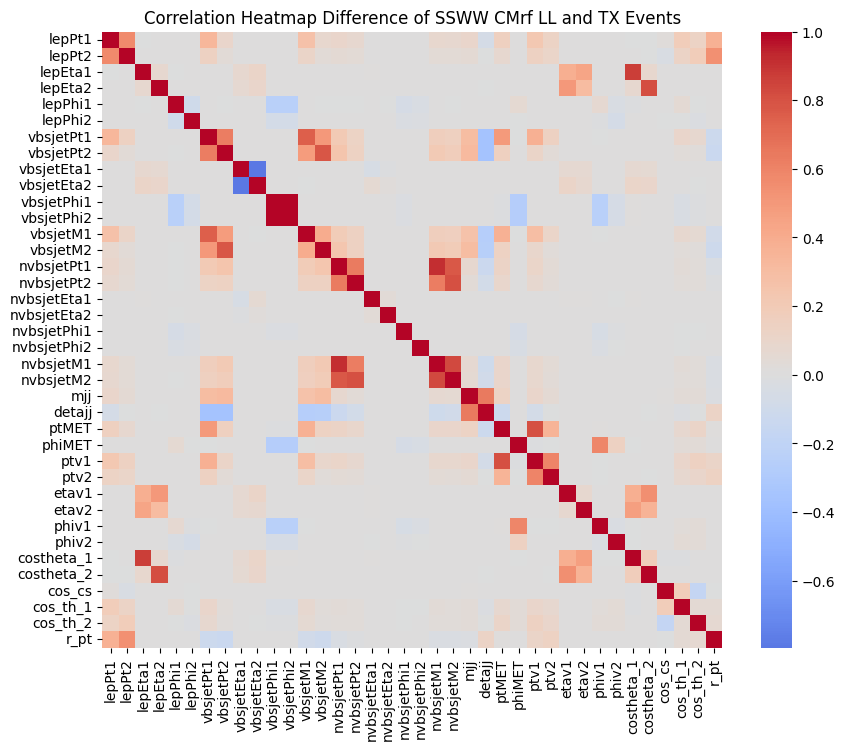

In [8]:
data_corr_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap Difference of SSWW CMrf LL and TX Events')
plt.savefig('corr_source/data_corr_source.png', dpi=500, bbox_inches='tight')

Signal minus background

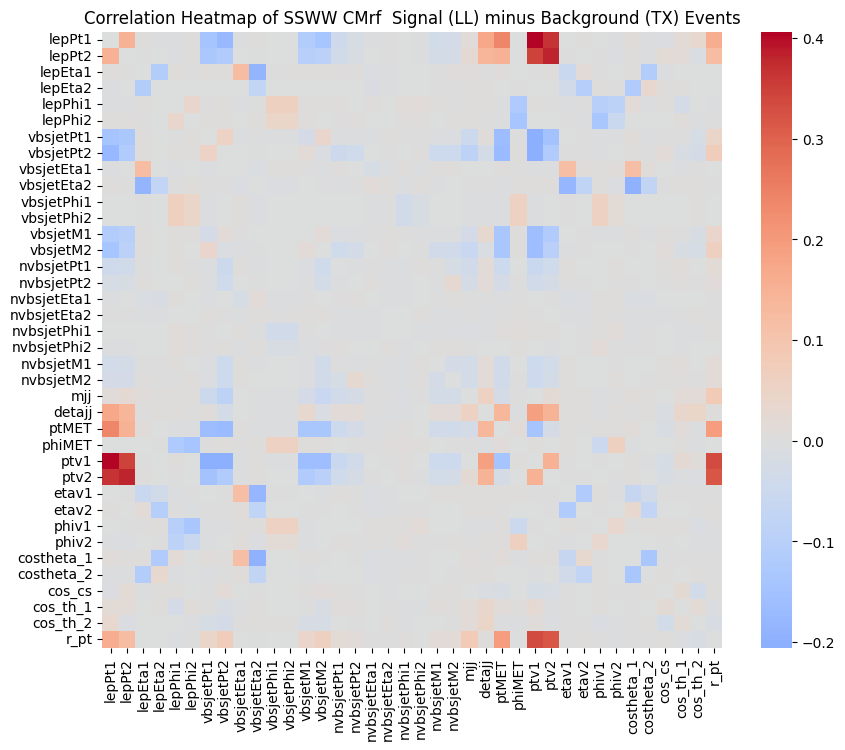

In [9]:
smb_corr_matrix = ll_corr_matrix - tx_corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(smb_corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Heatmap of SSWW CMrf  Signal (LL) minus Background (TX) Events')
plt.savefig('corr_source/smb_corr_source.png', dpi=500, bbox_inches='tight')

# Individual variable couples correlations

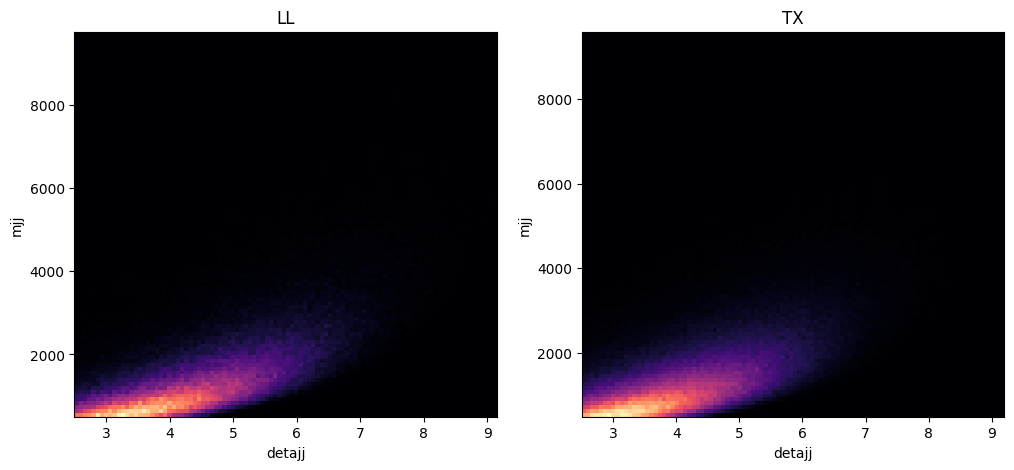

In [10]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
histll = ax[0].hist2d(ll_df['detajj'], ll_df['mjj'], bins=100, cmap='magma')
ax[0].set_xlabel('detajj')
ax[0].set_ylabel('mjj')
ax[0].set_title('LL')
histtx = ax[1].hist2d(tx_df['detajj'], tx_df['mjj'], bins=100, cmap='magma')
ax[1].set_xlabel('detajj')
ax[1].set_ylabel('mjj')
ax[1].set_title('TX')
plt.show()

(array([17074., 27735., 33416., 30087., 22153., 13412.,  6488.,  2316.,
          534.,    73.]),
 array([2.50012207, 3.16553955, 3.83095703, 4.49637451, 5.16179199,
        5.82720947, 6.49262695, 7.15804443, 7.82346191, 8.48887939,
        9.15429688]),
 <BarContainer object of 10 artists>)

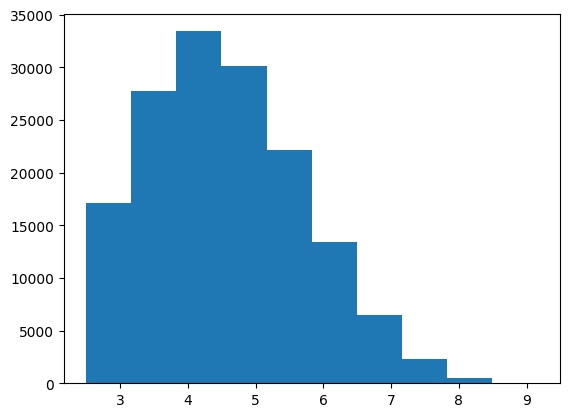

In [11]:
plt.hist(ll_df['detajj'])

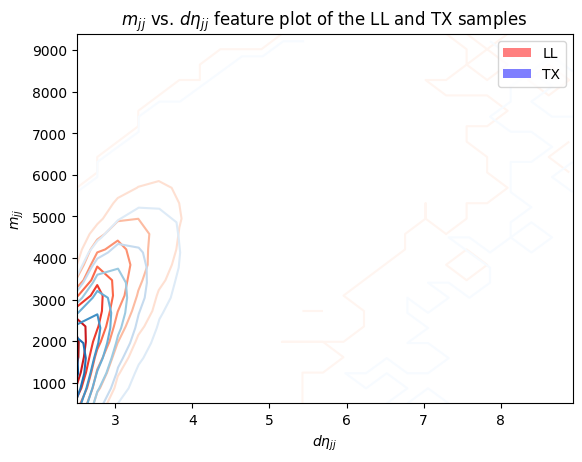

In [12]:
H, xedges, yedges = np.histogram2d(ll_df['detajj'], ll_df['mjj'], bins=25)
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(X.T, Y.T, H.T, cmap='Reds')
H, xedges, yedges = np.histogram2d(tx_df['detajj'], tx_df['mjj'], bins=25)
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(X.T, Y.T, H.T, cmap='Blues')

plt.xlabel(f'$d\eta_j$$_j$')
plt.ylabel(f'$m_j$$_j$')
plt.title(f'$m_j$$_j$ vs. $d\eta_j$$_j$ feature plot of the LL and TX samples')

proxy1 = Patch(facecolor='red', alpha=0.5, label='LL')
proxy2 = Patch(facecolor='blue', alpha=0.5, label='TX')
plt.legend(handles=[proxy1, proxy2], loc='upper right')

plt.show()

In [13]:
import matplotlib.pyplot as plt
print(plt.colormaps())  # Unsorted list of all registered colormap names
print(sorted(plt.colormaps(), key=str.lower))  # Case-insensitive sorted list


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

(array([[869., 697., 591., ...,   0.,   0.,   0.],
        [879., 764., 585., ...,   0.,   0.,   0.],
        [983., 849., 674., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([2.50001526, 2.56702682, 2.63403839, 2.70104996, 2.76806152,
        2.83507309, 2.90208466, 2.96909622, 3.03610779, 3.10311935,
        3.17013092, 3.23714249, 3.30415405, 3.37116562, 3.43817719,
        3.50518875, 3.57220032, 3.63921188, 3.70622345, 3.77323502,
        3.84024658, 3.90725815, 3.97426971, 4.04128128, 4.10829285,
        4.17530441, 4.24231598, 4.30932755, 4.37633911, 4.44335068,
        4.51036224, 4.57737381, 4.64438538, 4.71139694, 4.77840851,
        4.84542007, 4.91243164, 4.97944321, 5.04645477, 5.11346634,
        5.18047791, 5.24748947, 5.31450104, 5.3815126 , 5.44852417,
        5.51553574, 5.5825473 , 5.64955887, 5.71657043, 5.783582  ,

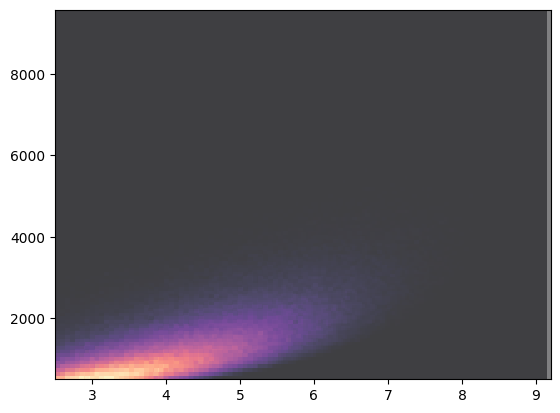

In [14]:
plt.hist2d(ll_df['detajj'], ll_df['mjj'], bins=100, cmap='magma', alpha=0.5)
plt.hist2d(tx_df['detajj'], tx_df['mjj'], bins=100, cmap='magma', alpha=0.5)

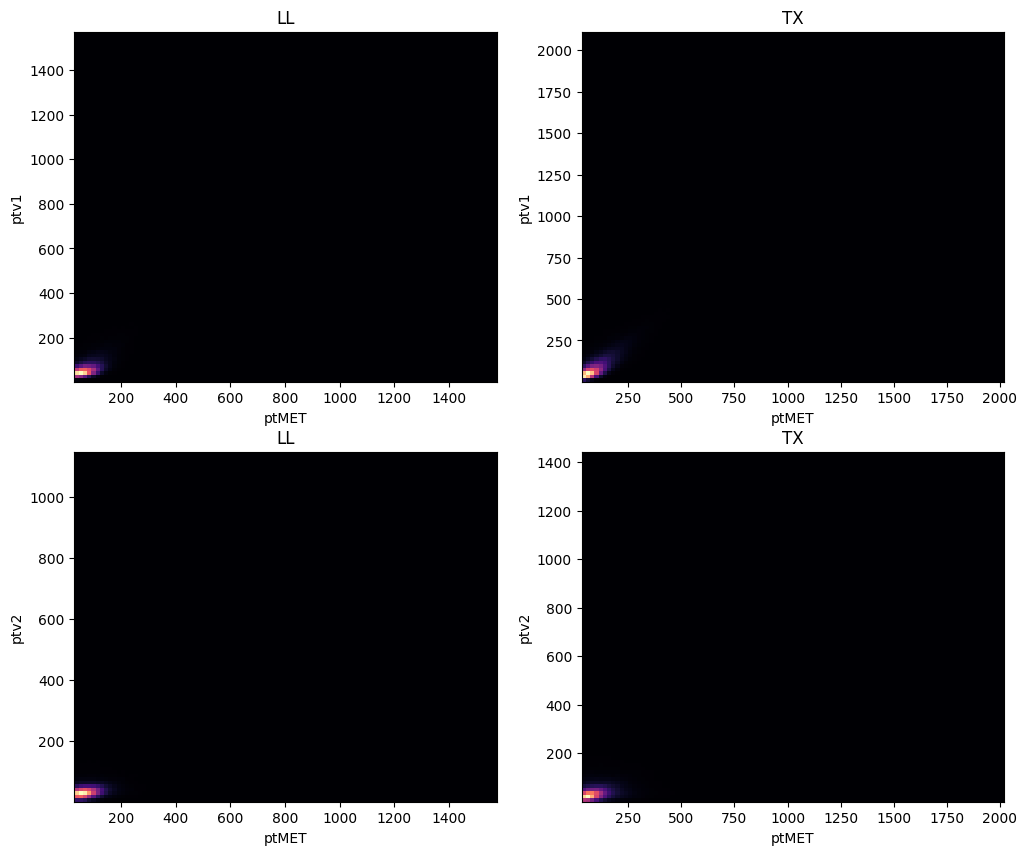

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
hist_ll1 = ax[0,0].hist2d(ll_df['ptMET'], ll_df['ptv1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('ptMET')
ax[0,0].set_ylabel('ptv1')
ax[0,0].set_title('LL')
hist_tx1 = ax[0,1].hist2d(tx_df['ptMET'], tx_df['ptv1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('ptMET')
ax[0,1].set_ylabel('ptv1')
ax[0,1].set_title('TX')
hist_ll2 = ax[1,0].hist2d(ll_df['ptMET'], ll_df['ptv2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('ptMET')
ax[1,0].set_ylabel('ptv2')
ax[1,0].set_title('LL')
hist_tx2 = ax[1,1].hist2d(tx_df['ptMET'], tx_df['ptv2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('ptMET')
ax[1,1].set_ylabel('ptv2')
ax[1,1].set_title('TX')
plt.show()

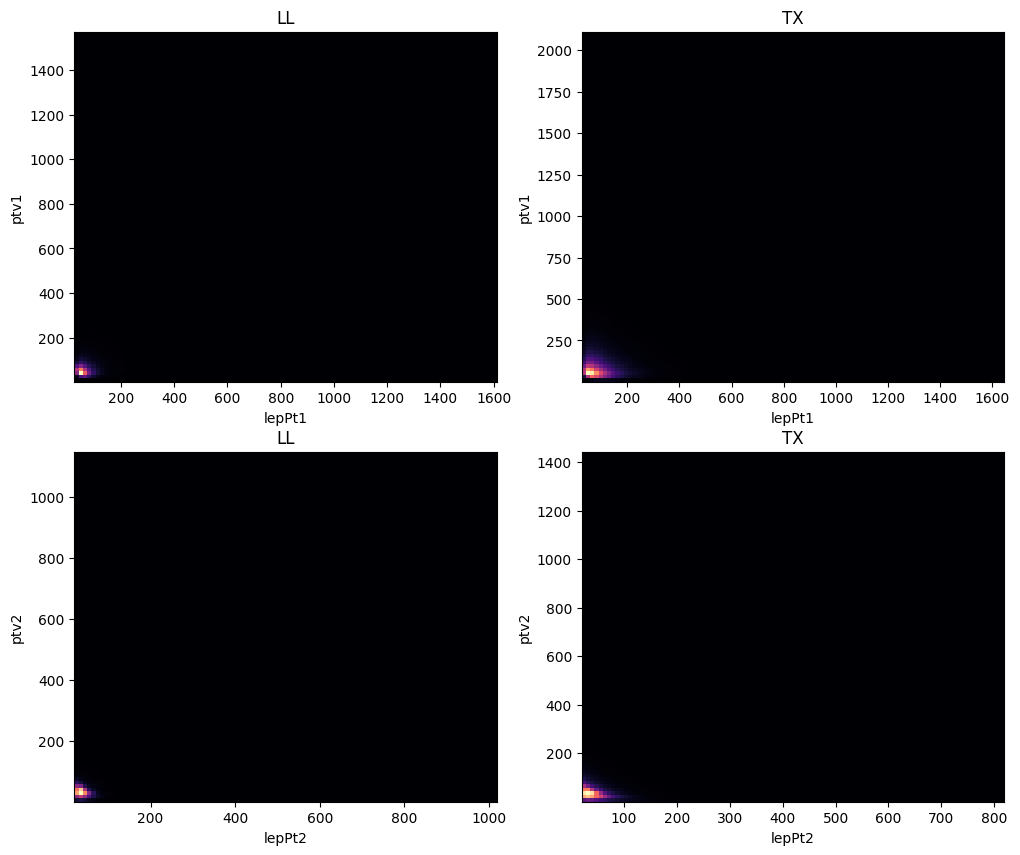

In [16]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
# x_sx = min(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))
# x_dx = max(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))
# y_sx = min(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))
# y_dx = max(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))

# ax[0,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll1 = ax[0,0].hist2d(ll_df['lepPt1'], ll_df['ptv1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('lepPt1')
ax[0,0].set_ylabel('ptv1')
ax[0,0].set_title('LL')
# ax[0,0].set_xlim(x_sx, x_dx)
# ax[0,0].set_ylim(y_sx, y_dx)
# ax[0,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx1 = ax[0,1].hist2d(tx_df['lepPt1'], tx_df['ptv1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('lepPt1')
ax[0,1].set_ylabel('ptv1')
ax[0,1].set_title('TX')
# ax[0,1].set_xlim(x_sx, x_dx)
# ax[0,1].set_ylim(y_sx, y_dx)
# ax[1,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll2 = ax[1,0].hist2d(ll_df['lepPt2'], ll_df['ptv2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('lepPt2')
ax[1,0].set_ylabel('ptv2')
ax[1,0].set_title('LL')
# ax[1,0].set_xlim(x_sx, x_dx)
# ax[1,0].set_ylim(y_sx, y_dx)
# ax[1,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx2 = ax[1,1].hist2d(tx_df['lepPt2'], tx_df['ptv2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('lepPt2')
ax[1,1].set_ylabel('ptv2')
ax[1,1].set_title('TX')
# ax[1,1].set_xlim(x_sx, x_dx)
# ax[1,1].set_ylim(y_sx, y_dx)

#plt.savefig('corrrr/lepPt-ptv.png')
plt.show()

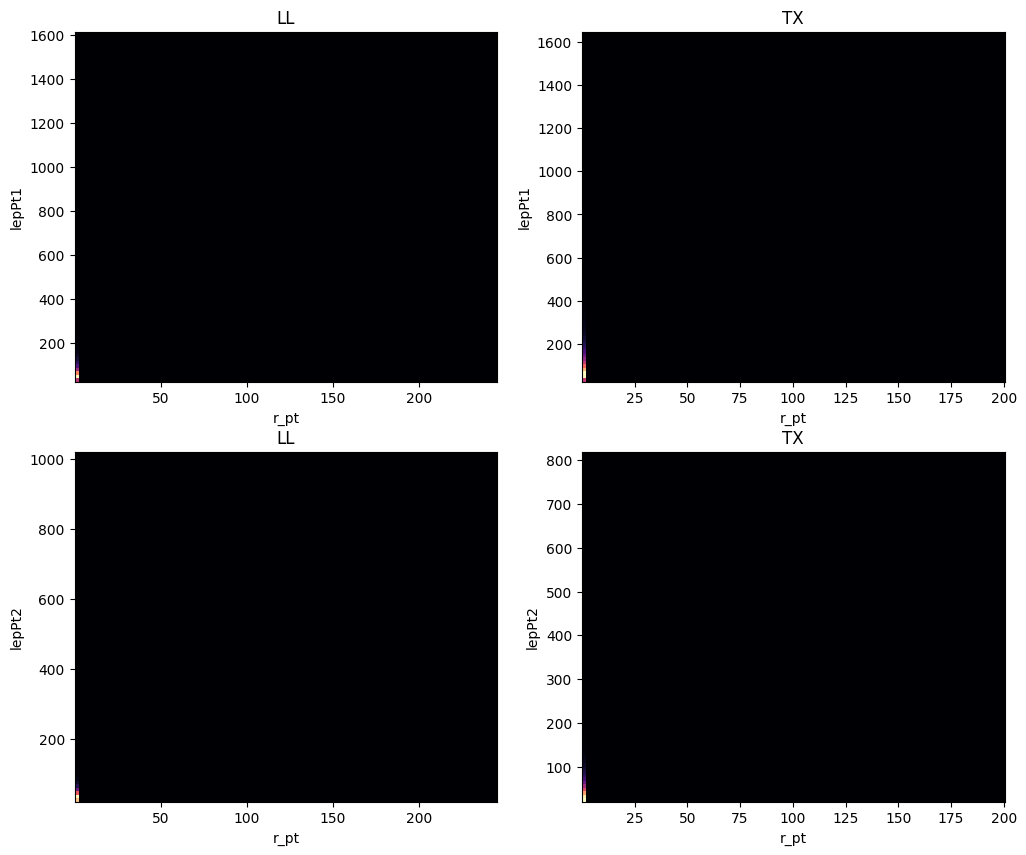

In [17]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
# x_sx = min(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# x_dx = max(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# y_sx = min(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))
# y_dx = max(np.concatenate([ll_df['lepPt1'], tx_df['lepPt1'], ll_df['lepPt2'], tx_df['lepPt2']]))

#ax[0,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll1 = ax[0,0].hist2d(ll_df['r_pt'], ll_df['lepPt1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('r_pt')
ax[0,0].set_ylabel('lepPt1')
ax[0,0].set_title('LL')
# ax[0,0].set_xlim(x_sx, x_dx)
# ax[0,0].set_ylim(y_sx, y_dx)
# ax[0,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx1 = ax[0,1].hist2d(tx_df['r_pt'], tx_df['lepPt1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('r_pt')
ax[0,1].set_ylabel('lepPt1')
ax[0,1].set_title('TX')
# ax[0,1].set_xlim(x_sx, x_dx)
# ax[0,1].set_ylim(y_sx, y_dx)
# ax[1,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll2 = ax[1,0].hist2d(ll_df['r_pt'], ll_df['lepPt2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('r_pt')
ax[1,0].set_ylabel('lepPt2')
ax[1,0].set_title('LL')
# ax[1,0].set_xlim(x_sx, x_dx)
# ax[1,0].set_ylim(y_sx, y_dx)
# ax[1,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx2 = ax[1,1].hist2d(tx_df['r_pt'], tx_df['lepPt2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('r_pt')
ax[1,1].set_ylabel('lepPt2')
ax[1,1].set_title('TX')
# ax[1,1].set_xlim(x_sx, x_dx)
# ax[1,1].set_ylim(y_sx, y_dx)
plt.show()

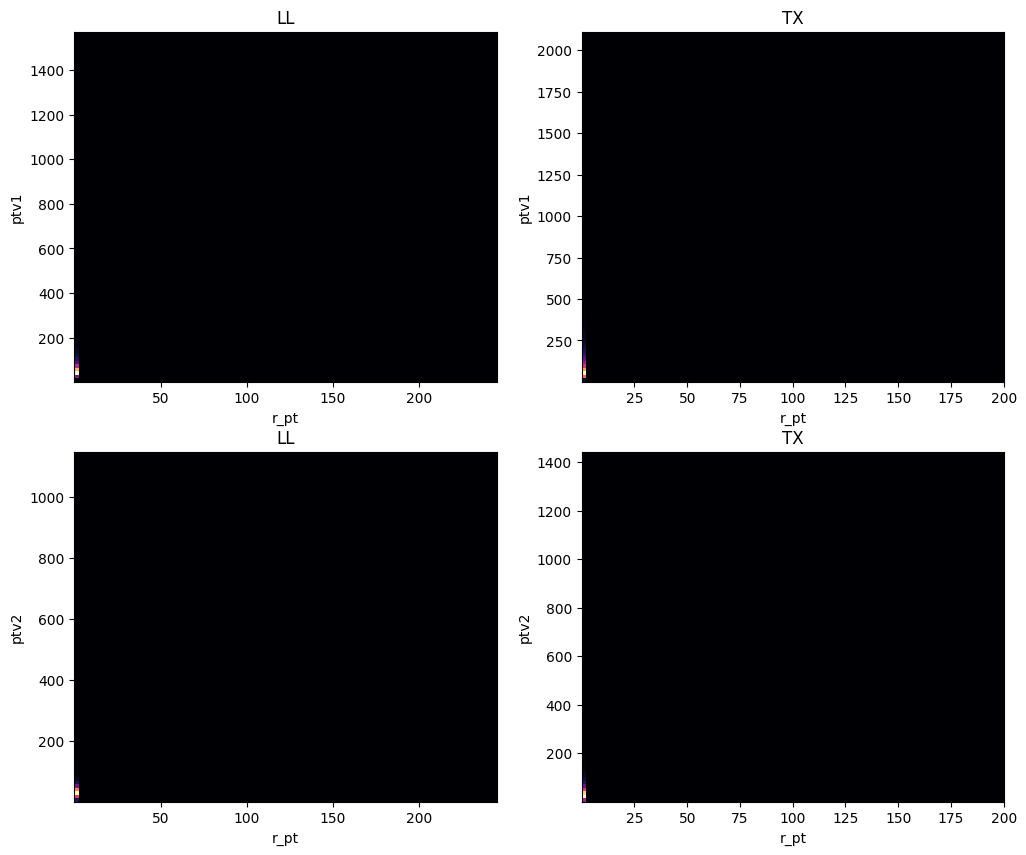

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
# x_sx = min(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# x_dx = max(np.concatenate([ll_df['r_pt'], tx_df['r_pt']]))
# y_sx = min(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))
# y_dx = max(np.concatenate([ll_df['ptv1'], tx_df['ptv1'], ll_df['ptv2'], tx_df['ptv2']]))

# ax[0,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll1 = ax[0,0].hist2d(ll_df['r_pt'], ll_df['ptv1'], bins=100, cmap='magma')
ax[0,0].set_xlabel('r_pt')
ax[0,0].set_ylabel('ptv1')
ax[0,0].set_title('LL')
# ax[0,0].set_xlim(x_sx, x_dx)
# ax[0,0].set_ylim(y_sx, y_dx)
# ax[0,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx1 = ax[0,1].hist2d(tx_df['r_pt'], tx_df['ptv1'], bins=100, cmap='magma')
ax[0,1].set_xlabel('r_pt')
ax[0,1].set_ylabel('ptv1')
ax[0,1].set_title('TX')
# ax[0,1].set_xlim(x_sx, x_dx)
# ax[0,1].set_ylim(y_sx, y_dx)
# ax[1,0].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_ll2 = ax[1,0].hist2d(ll_df['r_pt'], ll_df['ptv2'], bins=100, cmap='magma')
ax[1,0].set_xlabel('r_pt')
ax[1,0].set_ylabel('ptv2')
ax[1,0].set_title('LL')
# ax[1,0].set_xlim(x_sx, x_dx)
# ax[1,0].set_ylim(y_sx, y_dx)
# ax[1,1].axvspan(x_sx, x_dx, hatch='xx', facecolor='none', edgecolor='k', alpha=0.25)
hist_tx2 = ax[1,1].hist2d(tx_df['r_pt'], tx_df['ptv2'], bins=100, cmap='magma')
ax[1,1].set_xlabel('r_pt')
ax[1,1].set_ylabel('ptv2')
ax[1,1].set_title('TX')
# ax[1,1].set_xlim(x_sx, x_dx)
# ax[1,1].set_ylim(y_sx, y_dx)

#plt.savefig('corrrr/rPt-ptv.png')
plt.show()

In [19]:
#